In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [111]:
device = ""
if torch.cuda.is_available(): device = "cuda"
else: device = "cpu"

print("device used :- "+device)

device used :- cuda


In [112]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train,batch_size=256,shuffle=True,num_workers = 4)

test = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test,batch_size=256,shuffle=False,num_workers = 4)

Files already downloaded and verified
Files already downloaded and verified


In [113]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn, self).__init__()
        
        # 5 convolutional layers
        self.network = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

In [114]:
cnn = Cnn().to(device)

In [115]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.01)

In [116]:
def adjust_learning_rate(optimizer, epoch):
    if epoch < 150: lr = 0.1
    elif epoch < 250: lr = 0.01
    else: lr = 0.001
    for param_group in optimizer.param_groups: 
        param_group['lr'] = lr
        
    return lr

In [117]:
lost_lst = []

In [118]:
# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(train_loader):
        inputs,labels = inputs.to(device),labels.to(device)
        optimizer.zero_grad()        
        # Forward + backward + optimize
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()    
        
        # Print statistics
        running_loss += loss.item()
        # if i % 200 == 199:    # Print every 200 mini-batches
    print('[%d] loss: %.3f' % (epoch + 1,running_loss / 200))
    lost_lst.append(running_loss/200)
            
print('Finished training')

[1] loss: 1.673
[2] loss: 1.452
[3] loss: 1.365
[4] loss: 1.319
[5] loss: 1.265
[6] loss: 1.225
[7] loss: 1.193
[8] loss: 1.173
[9] loss: 1.144
[10] loss: 1.137
[11] loss: 1.113
[12] loss: 1.104
[13] loss: 1.111
[14] loss: 1.073
[15] loss: 1.084
[16] loss: 1.055
[17] loss: 1.055
[18] loss: 1.048
[19] loss: 1.035
[20] loss: 1.045
Finished training


In [119]:
def plotGraph(x):
    s = len(x)
    x = np.asarray(x)
    y = np.arange(1,s+1)
    plt.xlabel("epoch number")
    plt.ylabel("Running Loss")   
    plt.plot(y,x)
    plt.show()

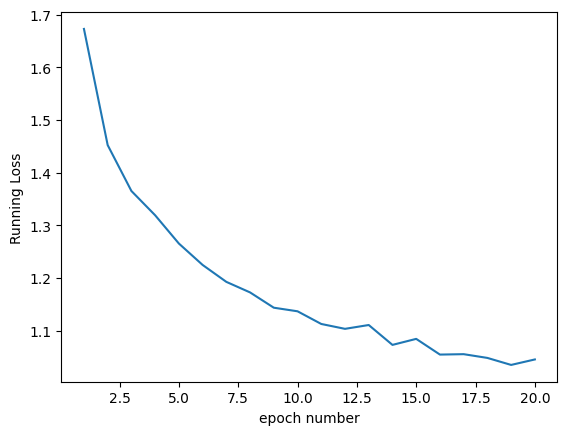

In [120]:
plotGraph(lost_lst)

In [121]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %
